In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics  import r2_score
import matplotlib.pyplot as plt 
import seaborn as sns

In [23]:
df = pd.read_csv("dataset3.csv", delimiter = ';')
df.sample(5)#эта команда выведет пять случайных строк таблицы, таблица не отобразиться полностью

,Продолжительность эксплуатации,Количество ремонтов,Температура окр среды,Срок эксплуатации,Внезаплные отказы,Изделия с дефектами,Замена деталий,Смена обслуживания,Влажность окр среды,Страна производитель
0,3,0,23,30,0,1,0,0,89,3
33,20,3,20,16,1,0,0,0,60,2
72,21,7,30,35,0,0,1,0,97,3
6,26,19,27,35,1,0,0,0,75,3
93,15,10,19,21,1,1,1,1,75,2


In [24]:
df.info()#общая информация о столбцах, типах и пропущенных значениях

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Продолжительность эксплуатации  100 non-null    int64
 1   Количество ремонтов             100 non-null    int64
 2   Температура окр среды           100 non-null    int64
 3   Срок эксплуатации               100 non-null    int64
 4   Внезаплные отказы               100 non-null    int64
 5   Изделия с дефектами             100 non-null    int64
 6   Замена деталий                  100 non-null    int64
 7   Смена обслуживания              100 non-null    int64
 8   Влажность окр среды             100 non-null    int64
 9   Страна производитель            100 non-null    int64
dtypes: int64(10)
memory usage: 8.6 KB


In [25]:
df.describe()#общие статистики

,Продолжительность эксплуатации,Количество ремонтов,Температура окр среды,Срок эксплуатации,Внезаплные отказы,Изделия с дефектами,Замена деталий,Смена обслуживания,Влажность окр среды,Страна производитель
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000
mean,16.510000,10.290000,21.560000,22.84000,0.510000,0.55,0.590000,0.470000,56.470000,2.100000
std,9.393201,6.268883,4.831128,7.45589,0.502418,0.50,0.494311,0.501614,24.300499,0.797724
min,0.000000,0.000000,14.000000,10.00000,0.000000,0.00,0.000000,0.000000,21.000000,1.000000
25%,8.750000,5.000000,17.000000,16.75000,0.000000,0.00,0.000000,0.000000,34.000000,1.000000
50%,17.500000,10.000000,21.000000,23.50000,1.000000,1.00,1.000000,0.000000,54.500000,2.000000
75%,25.000000,16.000000,26.000000,29.00000,1.000000,1.00,1.000000,1.000000,76.500000,3.000000
max,30.000000,20.000000,30.000000,35.00000,1.000000,1.00,1.000000,1.000000,100.000000,3.000000


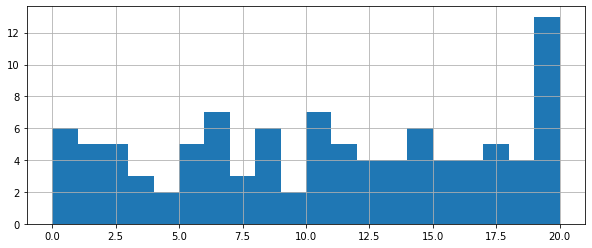

In [26]:
df['Количество ремонтов'].hist(bins=20,figsize=(10,4));# как распределено количество ремонтов

In [27]:
df[df['Количество ремонтов']>10]['Продолжительность эксплуатации'].count()
#Попробуем предсказать будет ли у модели больше 10 количеств ремонта или нет. В этмо случае у нас получается сбалансированный набор данных. Ниже выведем список столбцов и отберем те, которые будем использовать для классификатора.

49

In [28]:
df.columns# список столбцов нашего датасета

Index(['Продолжительность эксплуатации', 'Количество ремонтов',
       'Температура окр среды', 'Срок эксплуатации', 'Внезаплные отказы',
       'Изделия с дефектами', 'Замена деталий', 'Смена обслуживания',
       'Влажность окр среды', 'Страна производитель'],
      dtype='object')

In [29]:
col=[
    'Продолжительность эксплуатации', 'Количество ремонтов',
       'Температура окр среды', 'Срок эксплуатации', 'Внезаплные отказы',
       'Изделия с дефектами', 'Замена деталий', 'Смена обслуживания',
       'Влажность окр среды', 'Страна производитель'
]

In [30]:
# код ниже преобразует категорийные данные в переменные и заполняет пропуски наиболее вероятным значением
X=pd.DataFrame()
for i in col:
    if df[i].dtype.name != 'object':
        X[i]=df[i].copy()
        X.loc[X[i].isna(),i]=X[i].median()
    else:
        X[i]=pd.factorize(df[i])[0]

In [31]:
X.sample(10)# результат, подготовленные данные

,Продолжительность эксплуатации,Количество ремонтов,Температура окр среды,Срок эксплуатации,Внезаплные отказы,Изделия с дефектами,Замена деталий,Смена обслуживания,Влажность окр среды,Страна производитель
64,23.0,20.0,23.0,18.0,0.0,1.0,0.0,1.0,91.0,1.0
7,24.0,8.0,20.0,32.0,0.0,0.0,0.0,0.0,79.0,2.0
21,16.0,15.0,14.0,20.0,1.0,1.0,1.0,0.0,29.0,3.0
36,1.0,5.0,28.0,24.0,1.0,1.0,1.0,0.0,60.0,3.0
51,27.0,19.0,29.0,25.0,0.0,0.0,1.0,0.0,81.0,3.0
69,23.0,1.0,28.0,17.0,1.0,1.0,0.0,1.0,78.0,1.0
62,1.0,3.0,17.0,14.0,1.0,1.0,0.0,1.0,40.0,1.0
66,16.0,12.0,14.0,18.0,0.0,1.0,1.0,0.0,95.0,1.0
31,21.0,20.0,23.0,32.0,0.0,0.0,1.0,0.0,50.0,2.0
27,11.0,14.0,17.0,35.0,0.0,1.0,1.0,1.0,26.0,3.0


In [32]:
# Y будет равен нулю если отзывов 10 и меньше, и единице если больше 10
Y=df['Количество ремонтов'].apply(lambda x : 1 if x>10 else 0).values

In [33]:
#разделим набор на тренировочный и тестовый
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [34]:
# создаем и тренируем модель, отдельно можно провести подбор параметров для повышения точности
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
importances=model.feature_importances_
indices=np.argsort(importances)[::-1]

ar_f=[]
for f,idx in enumerate(indices):
    ar_f.append([round(importances[idx],4),col[idx]])
print('Значимость признака: ')
ar_f.sort(reverse=True)
ar_f

Значимость признака: 


[[0.7773, 'Количество ремонтов'],
 [0.049, 'Срок эксплуатации'],
 [0.0477, 'Влажность окр среды'],
 [0.0416, 'Температура окр среды'],
 [0.0382, 'Продолжительность эксплуатации'],
 [0.0143, 'Смена обслуживания'],
 [0.0113, 'Внезаплные отказы'],
 [0.0103, 'Страна производитель'],
 [0.0065, 'Замена деталий'],
 [0.0038, 'Изделия с дефектами']]

(-1.0, 10.0)

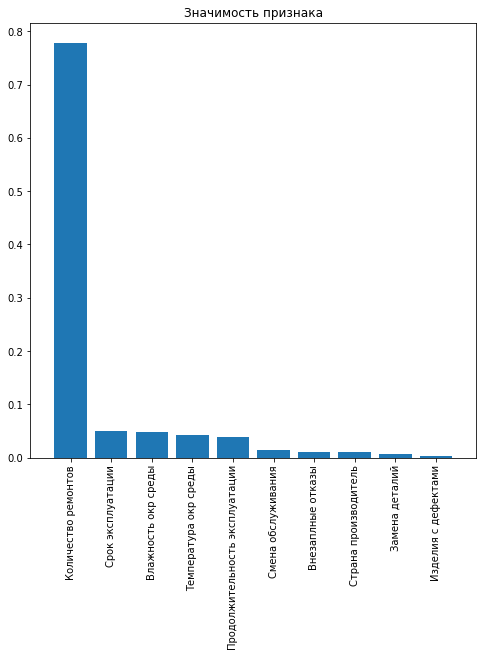

In [36]:
#столбчатая диаграмма
d_first=len(col)
plt.figure(figsize=(8,8))
plt.title('Значимость признака')
plt.bar(range(d_first),importances[indices[:d_first]],align='center')
plt.xticks(range(d_first),np.array(col)[indices[:d_first]],rotation=90)
plt.xlim([-1,d_first])

In [37]:
model.predict(X_test)
# как выглядит результат предсказания для тестовой выборки

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [38]:
y_test
# как выглядядт результаты тестового набора

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [39]:
# метрика r2
r2_score(model.predict(X_test),y_test)

1.0

In [40]:
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,model.predict(X_test)))

Accuracy: 1.0


In [41]:
# матрица количества правильно и ошибочно угаданных классов
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict(X_test))

array([[12,  0],
       [ 0,  8]], dtype=int64)